In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('StudentPerformanceFactors.csv')
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [2]:
list(df.columns)

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

# Cleaning Data

In [3]:
#Checking overall data size
print(df.shape)

(6607, 20)


In [4]:
#Checking for rows with missing data
missing_values = df.isnull().sum()
print(missing_values)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [5]:
#Dropping rows with empty cells
df2 = df.dropna()

missing_values2 = df2.isnull().sum()
print(missing_values2)

print(df2.shape)

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64
(6378, 20)


In [6]:
#Finding information on unique data counts
unique_data = df2.nunique()
print(unique_data)

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64


In [11]:
#Finding unique values
unique_values = df2.apply(pd.Series.unique)
print (unique_values)

Hours_Studied                 [23, 19, 24, 29, 25, 17, 21, 9, 10, 14, 22, 15...
Attendance                    [84, 64, 98, 89, 92, 88, 78, 94, 80, 97, 83, 8...
Parental_Involvement                                        [Low, Medium, High]
Access_to_Resources                                         [High, Medium, Low]
Extracurricular_Activities                                            [No, Yes]
Sleep_Hours                                              [7, 8, 6, 10, 9, 5, 4]
Previous_Scores               [73, 59, 91, 98, 65, 89, 68, 50, 80, 71, 88, 8...
Motivation_Level                                            [Low, Medium, High]
Internet_Access                                                       [Yes, No]
Tutoring_Sessions                                   [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                               [Low, Medium, High]
Teacher_Quality                                             [Medium, High, Low]
School_Type                             

In [24]:
#Replacing object values with int for the correlation matrix
df2.replace({'Low': 0, 'Medium': 1, 'High': 2}, inplace=True)
df2.replace({'No': 0, 'Yes': 1}, inplace=True)
df2.replace({'Far': 0, 'Moderate': 1, 'Near': 2}, inplace=True)
df2.replace({'Negative': 0, 'Neutral': 1, 'Positive': 2}, inplace=True)
df2.replace({'High School': 0, 'College': 1, 'Postgraduate': 2}, inplace=True)
df2.replace({'Male': 0, 'Female': 1}, inplace=True)
df2.replace({'Public': 0, 'Private': 1}, inplace=True)


unique_values = df2.apply(pd.Series.unique)
print (unique_values)

Hours_Studied                 [23, 19, 24, 29, 25, 17, 21, 9, 10, 14, 22, 15...
Attendance                    [84, 64, 98, 89, 92, 88, 78, 94, 80, 97, 83, 8...
Parental_Involvement                                                  [0, 1, 2]
Access_to_Resources                                                   [2, 1, 0]
Extracurricular_Activities                                               [0, 1]
Sleep_Hours                                              [7, 8, 6, 10, 9, 5, 4]
Previous_Scores               [73, 59, 91, 98, 65, 89, 68, 50, 80, 71, 88, 8...
Motivation_Level                                                      [0, 1, 2]
Internet_Access                                                          [1, 0]
Tutoring_Sessions                                   [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                                         [0, 1, 2]
Teacher_Quality                                                       [1, 2, 0]
School_Type                             

In [25]:
print(df2.dtypes)

Hours_Studied                 int64
Attendance                    int64
Parental_Involvement          int64
Access_to_Resources           int64
Extracurricular_Activities    int64
Sleep_Hours                   int64
Previous_Scores               int64
Motivation_Level              int64
Internet_Access               int64
Tutoring_Sessions             int64
Family_Income                 int64
Teacher_Quality               int64
School_Type                   int64
Peer_Influence                int64
Physical_Activity             int64
Learning_Disabilities         int64
Parental_Education_Level      int64
Distance_from_Home            int64
Gender                        int64
Exam_Score                    int64
dtype: object


# Visualizing Data

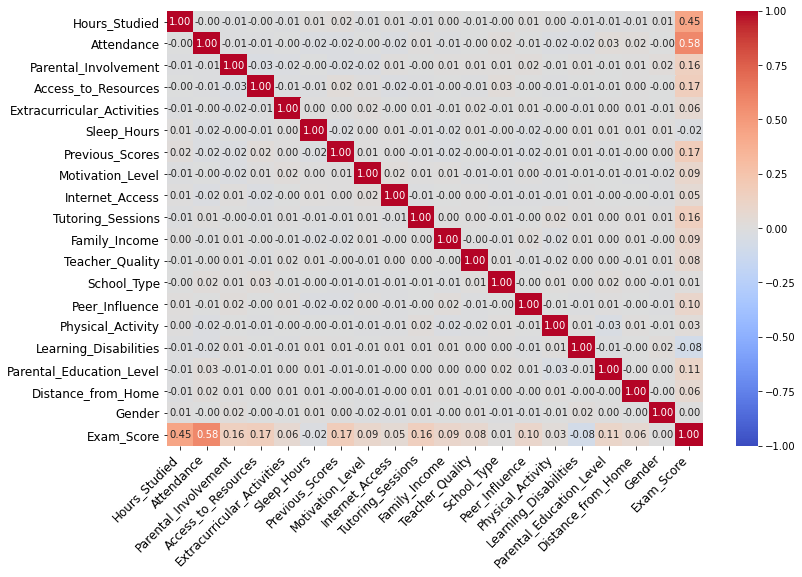

In [29]:
#Checking correlation levels betwen each metric

import seaborn as sns

corr_matrix = df2.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', annot_kws={'size': 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

### The data shows that the strongest correlations for high exam scores are how long the student studied and their attendance record.  Both of these correlations would be considered weak to moderate.

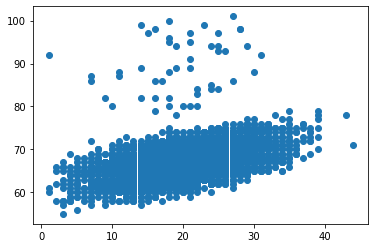

In [39]:
#Representing the Hours_Studied correlation graphically

import numpy as np

x = df2.Hours_Studied
y = df2.Exam_Score

plt.scatter(x, y)
plt.show()

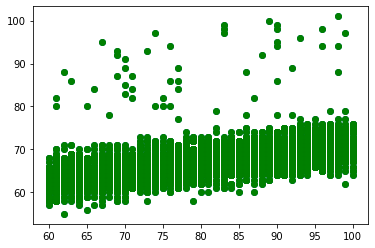

In [45]:
#Representing the Attendance correlation graphically

x = df2.Attendance 
y = df2.Exam_Score

plt.scatter(x, y)
plt.scatter(x, y, color = 'green')
plt.show()

# Conclusion

### The analysis reveals weak to moderate correlations between the variables, indicating that none of the metrics are strongly correlated with successful exam scores.